<a href="https://colab.research.google.com/github/trungnt13/uef_bay1_2018/blob/master/ex0_intro_bayes/tut2_apple_orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install tf-nightly tfp-nightly seaborn

# Simulated the coloured boxes experiment

Suppose that we have three coloured boxes r (red), b (blue), and g (green). 

Box **r** contains 3 apples, 4 oranges, and 3 limes, 

box **b** contains 1 apple, 1 orange, and 0 limes, and 

box **g** contains 3 apples, 3 oranges, and 4 limes. 

If a box is chosen at random with probabilities $p(r) = 0.2$,  $p(b) = 0.2$, $p(g) = 0.6$, 

and a piece of fruit is removed from the box (with equal probability of selecting any of the items in the box).

In [0]:
import matplotlib
from matplotlib import pyplot as plt

import seaborn

import numpy as np
from scipy.stats import itemfreq

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tf.enable_eager_execution()

## Define the model

We need to translate the process of data generation. 

To get a fruit, we have to follow these steps:

1. We draw a sample from _boxes_ distribution
2. We got the box, one of red, blue, green
3. We open the box and pick one fruit equal randomly

The _boxes_ should come from **Categorical** distribution, since you only pick one box at a time, hence, if we pick red, then the box could not be blue or green

The fruit in each box is also a **Categorical** distribution, since we only pick one fruit from given box at a time.

In [12]:
boxes = tfd.Categorical(probs=[0.2, # p(r)
                               0.2, # p(b)
                               0.6], # p(g)
                        name="DistributionOfBoxes")
fruits = tfd.Mixture(
    cat=boxes,
    components=[
        # in order, the probabilities of: apple, orange, lime
        tfd.Categorical(probs=[0.3, 0.4, 0.3], name="RedBox"),
        tfd.Categorical(probs=[0.5, 0.5, 0.0], name="BlueBox"),
        tfd.Categorical(probs=[0.3, 0.3, 0.4], name="GreenBox"),
    ],
    name="DistributionOfFruits")

print(boxes)
print(fruits)

tfp.distributions.Categorical("DistributionOfBoxes/", batch_shape=(), event_shape=(), dtype=int32)
tfp.distributions.Mixture("DistributionOfFruits/", batch_shape=(), event_shape=(), dtype=int32)


## Explaining the model

The **Mixture** model replecting our process of sampling the fruits

Our model has 3 components representing three boxes

and to choose which box will be selected, it will use the **boxes** distribution to draw box sample first,

then selecting and appropriate componenent to draw the fruit

* 0: for apple
* 1: for orange
* 2: for lime

In [13]:
# analytically calculate the probability of each fruit
print("p(apple)  =", tf.exp(fruits.log_prob(0))) # answer for question 3a), maybe?
print("p(orange) =", tf.exp(fruits.log_prob(1)))
print("p(lime)   =", tf.exp(fruits.log_prob(2)))

p(apple)  = tf.Tensor(0.33999997, shape=(), dtype=float32)
p(orange) = tf.Tensor(0.35999998, shape=(), dtype=float32)
p(lime)   = tf.Tensor(0.29999998, shape=(), dtype=float32)


## Drawing the sample from the model

NOTE: this sampling process is only true if we return the fruit to the box after we pick it up

or we have an **infinitely auto-refilled** boxes

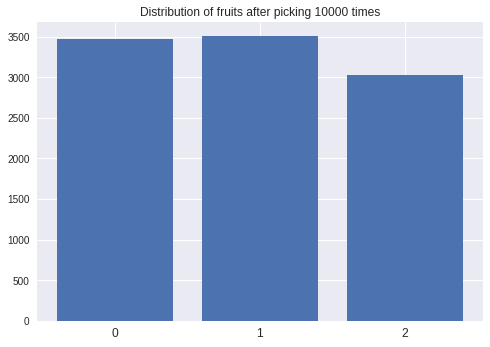

In [15]:
n_samples = 10000
samples = fruits.sample(n_samples)
distribution = itemfreq(samples)
plt.bar(distribution[:, 0], distribution[:, 1])
plt.title("Distribution of fruits after picking %d times" % n_samples)
_ = plt.xticks(np.arange(0, 3), fontsize=12)

## Calculating the log-probability


In [16]:
samples1 = fruits.sample(10)
samples2 = [0, 1, 2, 2, 2, 2, 2, 2, 2, 2]

llk1 = tf.reduce_sum(fruits.log_prob(samples1))
print("log[p(sample1|model)] =", llk1)

llk2 = tf.reduce_sum(fruits.log_prob(samples2))
print("log[p(sample2|model)] =", llk2)

if llk1 > llk2:
  print('Samples-1 are more likely to be generated from our model')
elif llk1 == llk2:
  print('Both samples are equal likely to be generated from our model')
else:
  print('Samples-2 are more likely to be generated from our model')

log[p(sample1|model)] = tf.Tensor(-11.299596, shape=(), dtype=float32)
log[p(sample2|model)] = tf.Tensor(-11.732244, shape=(), dtype=float32)
Samples-1 are more likely to be generated from our model
